# FEL energy resolution and jitter

This log is part of the experiment 20139026 at beamline DiProi at Fermi/Trieste (Oct.2017)

Here we analyse the FEL photon energy resolution and jitter

### Import

In [10]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
import h5py

### Define useful functions

In [11]:
def gaussian(x,a,b,c,d):
    return np.abs(a)*np.exp(-4*np.log(2)*(x-b)**2./(c**2))+d

def gaussian0(x,a,b,c):
    return np.abs(a)*np.exp(-4*np.log(2)*(x-b)**2./(c**2))

def fit(function,x,y,p0=None,sigma=None,bounds=None):
    '''
    fits a function and return the fit resulting parameters and curve
    '''
    popt,pcov = curve_fit(function,x,y,p0=p0,sigma=sigma)
    x = np.arange(0,1e3,1e-2)
    curve = function(x,*popt)
    perr = np.sqrt(np.diag(pcov))
    return popt,x,curve,perr

### Files and folders 

In [12]:
file_path = '/Users/fivos/Documents/Projects/27_Fermi_Catalysis/04_data_analysis/01_data/02_test_FEL_spec/'
file_name = file_path+'Sequence_349449622.h5'
h5file = h5py.File(file_name, 'r')

### Load data

In [13]:
hor_spectrum   = h5file['photon_diagnostics/Spectrometer/hor_spectrum']
WavelenghtSpan = h5file['photon_diagnostics/Spectrometer/WavelengthSpan'].value
Pixel2micron = h5file['photon_diagnostics/Spectrometer/Pixel2micron'].value

Wavelenght     = h5file['photon_source/SeedLaser/Wavelength'].value
Wavelenght/=12*5

### Get Energy axis

This is taken from the matlab script (thanks Emanuele). 

In [14]:
ind = np.arange(0,1000)-500
x = Wavelenght + ind*Pixel2micron*WavelenghtSpan/1000

h = 4.135667662*10**(-18)#ev s
c = 299792458 #m/s
Energy = h*c/x*1e12
x1,x2 = 100,250

### Plot single shots and average

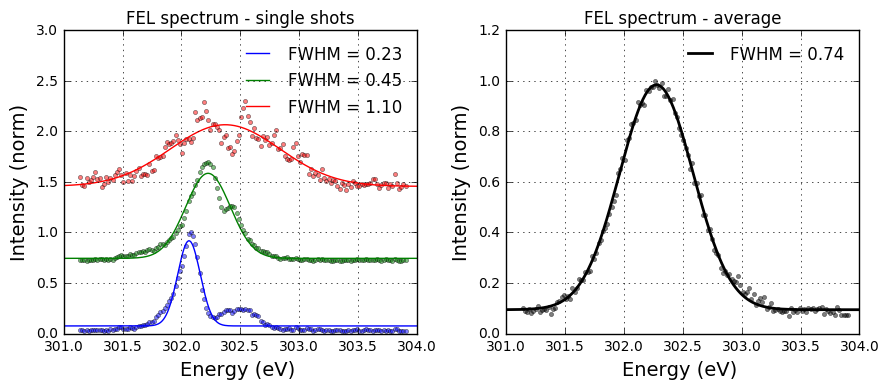

In [15]:
plt.figure(figsize=[9,4])
plt.subplot(1,2,1)
i = 0
y =  hor_spectrum[i,x1:x2]/float(max(hor_spectrum[i,x1:x2]))
y/= float(max(y))
popt,xc,curve,perr = fit(gaussian,Energy[x1:x2],y,p0=[1,302,1,0])
plt.plot(Energy[x1:x2], y,'o',markersize=3,alpha=0.5,c='blue')
plt.plot(xc,curve,lw=1,c='blue',label = 'FWHM = %.2f'%popt[2])
#plt.axvline(x=popt[1]+popt[2]/2,ls='--',c='black',alpha=0.5)
#plt.axvline(x=popt[1]-popt[2]/2,ls='--',c='black',alpha=0.5)

i = 20
y =  hor_spectrum[i,x1:x2]/float(max(hor_spectrum[i,x1:x2]))
y/= float(max(y))
popt,xc,curve,perr = fit(gaussian,Energy[x1:x2],y,p0=[1,302,1,0])
plt.plot(Energy[x1:x2], y+0.7,'o',markersize=3,alpha=0.5,c='green')
plt.plot(xc,curve+0.7,lw=1,c='green',label = 'FWHM = %.2f'%popt[2])
#plt.axvline(x=popt[1]+popt[2]/2,ls='--',c='black',alpha=0.5)
#plt.axvline(x=popt[1]-popt[2]/2,ls='--',c='black',alpha=0.5)

i = 3
y =  hor_spectrum[i,x1:x2]/float(max(hor_spectrum[i,x1:x2]))
y/= float(max(y))
popt,xc,curve,perr = fit(gaussian,Energy[x1:x2],y,p0=[1,302,1,0])
plt.plot(Energy[x1:x2], y+1.3,'o',markersize=3,alpha=0.5,c='red')
plt.plot(xc,curve+1.3,lw=1,c='red',label = 'FWHM = %.2f'%popt[2])
#plt.axvline(x=popt[1]+popt[2]/2,ls='--',c='black',alpha=0.5)
#plt.axvline(x=popt[1]-popt[2]/2,ls='--',c='black',alpha=0.5)

plt.xlim(301,304)
plt.ylim([0,3])
plt.xlabel(r'Energy (eV) ',size=14)
plt.ylabel(r'Intensity (norm)',size=14)
plt.title('FEL spectrum - single shots')
plt.legend(frameon=False,loc='upper right', prop={'size': 12})
plt.savefig('/Users/fivos/Desktop/fig.png',dpi=300)
plt.grid()

plt.subplot(1,2,2)
y =  np.average(hor_spectrum[:,x1:x2],axis=0)#hor_spectrum[i,x1:x2]/float(max(hor_spectrum[i,x1:x2]))
y/= float(max(y))
popt,xc,curve,perr = fit(gaussian,Energy[x1:x2],y,p0=[1,302,1,0])
plt.plot(Energy[x1:x2], y,'o',markersize=3,alpha=0.5,c='black')
plt.plot(xc,curve,lw=2,c='black',label = 'FWHM = %.2f'%popt[2])
#plt.axvline(x=popt[1]+popt[2]/2,ls='--',c='black',alpha=0.5)
#plt.axvline(x=popt[1]-popt[2]/2,ls='--',c='black',alpha=0.5)

plt.xlim(301,304)
plt.ylim([0,1.2])
plt.xlabel(r'Energy (eV) ',size=14)
plt.ylabel(r'Intensity (norm)',size=14)
plt.title('FEL spectrum - average')
plt.legend(frameon=False,loc='upper right', prop={'size': 12})
plt.grid()


plt.tight_layout()
plt.savefig('/Users/fivos/Desktop/fig.png',dpi=300)

plt.show()

### Loop over shots and plot the histograms

In [16]:
n_shots = hor_spectrum.shape[0]
fwhm = np.zeros(n_shots)
center = np.zeros(n_shots)

for i in range(n_shots):
    y = hor_spectrum[i,x1:x2]/float(max(hor_spectrum[i,x1:x2]))
    y/= max(y)
    popt,xc,curve,perr = fit(gaussian,Energy[x1:x2],y,p0=[1,302,1,0])
    fwhm[i] = popt[2]
    center[i] = popt[1]

[  2.43868963e-01   3.02269835e+02   2.97028364e-01]


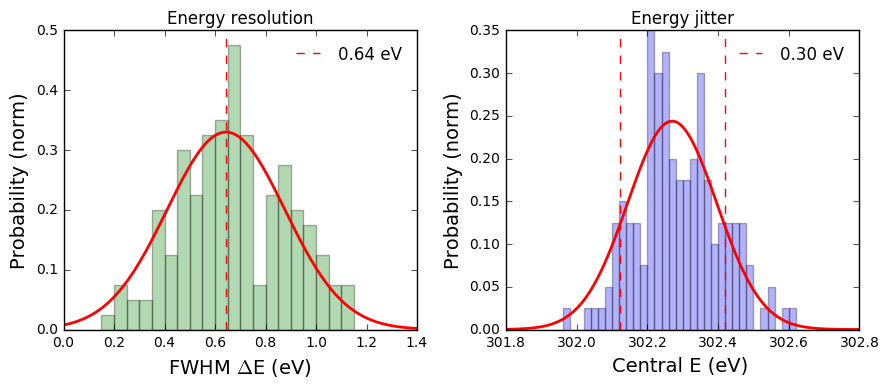

In [17]:
plt.figure(figsize=[9,4])

plt.subplot(1,2,1)
bi,bf,db = 0,2,.05
bins = np.arange(bi,bf,db)
hy,hx = np.histogram(fwhm,bins=bins)
hx = hx[:-1]
hy = np.array(hy,dtype=float)/float(len(bins))
popt,xc,curve,perr = fit(gaussian0,hx[hy>0],hy[hy>0],p0=[10,0.5,1])
#plt.plot(hx[hy>0],hy[hy>0],c='black',alpha=0.5)
plt.bar(hx,hy,width=db,color='green',alpha=0.3)

plt.plot(xc,curve,c='red',lw=2)
plt.axvline(x=popt[1],ls='--',c='red',label='%.2f eV'%popt[1])
plt.xlim(0,1.4)
plt.xlabel(r'FWHM $\Delta$E (eV) ',size=14)
plt.ylabel(r'Probability (norm)',size=14)
plt.title('Energy resolution')
plt.legend(frameon=False,loc='upper right', prop={'size': 12})


plt.subplot(1,2,2)
bi,bf,db = Energy[x1],Energy[x2],.02
hy,hx = np.histogram(center,bins=np.arange(bi,bf,db))
hx = hx[:-1]
hy = np.array(hy,dtype=float)/float(len(bins))

popt,xc,curve,perr = fit(gaussian0,hx[hy>0],hy[hy>0],p0=[0.3,302.5,0.1])
print popt
#plt.plot(hx[hy>0],hy[hy>0],c='black',alpha=0.5)
plt.plot(xc,curve,c='red',lw=2)
plt.axvline(x=popt[1]+popt[2]/2,ls='--',c='red',label='%.2f eV'%popt[2],lw=1)
plt.axvline(x=popt[1]-popt[2]/2,ls='--',c='red',lw=1)

plt.xlim([301.8,302.8])
plt.bar(hx,hy,width=db,color='blue',alpha=0.3)
plt.xlabel(r'Central E (eV) ',size=14)
plt.ylabel(r'Probability (norm)',size=14)
plt.title('Energy jitter')
plt.tight_layout()
plt.legend(frameon=False,loc='upper right', prop={'size': 12})
plt.savefig('/Users/fivos/Desktop/fig.png',dpi=300)

plt.show()